# Advanced Lane Finding Project:

## Import Dependencies

In [2]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load Images and Find Corners

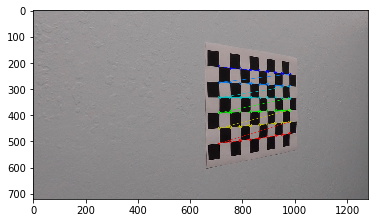

In [15]:
def load_calibration_images():
    paths = glob.glob('camera_cal/*.jpg')
    return np.array([cv2.imread(path) for path in paths])

objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

def to_gray(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def find_corners(image, name = None):
    ret, corners = cv2.findChessboardCorners(to_gray(image), (9, 6), None)
    if not ret:
        print('could not find corners in image: {}'.format(name))
        return 
    
    return corners
            
def draw(image, corners):
    if corners is None:
        print('no corners to draw')
    painted = cv2.drawChessboardCorners(image, (9, 6), corners, True)
    plt.imshow(painted)

            
images = load_calibration_images()
image_num = 19

image = images[image_num]
corners = find_corners(image, image_num)
draw(image, corners)

# Get Points and Define Calibrate 

In [4]:


def get_points(images):
    obj_points = []
    img_points = []
    
    for i, image in enumerate(images):
        corners = find_corners(image, i)
        if corners is not None:
            obj_points.append(objp)
            img_points.append(corners)
    return obj_points, img_points
    

def calibrate_camera(image, objpoints, imgpoints):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, to_gray(image).shape[::-1], None, None)
    return cv2.undistort(image, mtx, dist, None, mtx)


obj_points, img_points = get_points(images)

could not find corners in image: 0
could not find corners in image: 1
could not find corners in image: 3
could not find corners in image: 6


# Calibrate and Visualize

Text(0.5,1,'Undistorted Image')

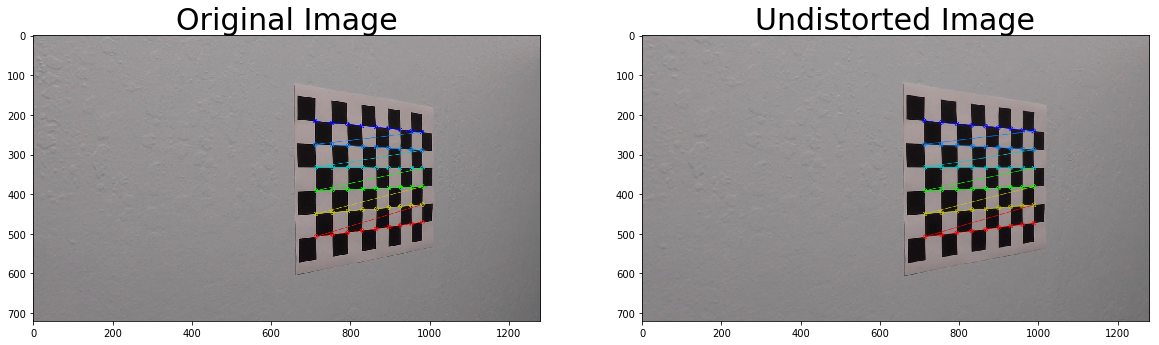

In [16]:
calibrated = calibrate_camera(image, obj_points, img_points)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(calibrated)
ax2.set_title('Undistorted Image', fontsize=30)